In [1]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d moltean/fruits


100% 1.28G/1.28G [00:05<00:00, 246MB/s]
100% 1.28G/1.28G [00:05<00:00, 235MB/s]


In [4]:
import zipfile
import os
zip_file_path = "./fruits.zip"
extracted_dir = "./fruits"
os.makedirs(extracted_dir, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
extracted_files = os.listdir(extracted_dir)
print("Extracted files:", extracted_files)

Extracted files: ['fruits-360-original-size', 'fruits-360_dataset']


In [30]:
import os
import cv2
import numpy as np

np.random.seed(1234)

directory = "./fruits/fruits-360_dataset/fruits-360/Training/"
classes = ["Apple Golden 1", "Avocado", "Banana", "Cherry 1", "Cocos", "Kiwi",
           "Lemon", "Mango", "Orange"]

all_arrays = []
img_size = 100

for class_num, class_name in enumerate(classes):
    path = os.path.join(directory, class_name)
    for img_file in os.listdir(path):
        img_path = os.path.join(path, img_file)
        img_array = cv2.imread(img_path)
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            all_arrays.append([img_array, class_num])
        else:
            print(f"Unable to read image: {img_path}")


In [31]:
directory2="./fruits/fruits-360_dataset/fruits-360/Test/"
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

<ipython-input-32-f317b13de5fe>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


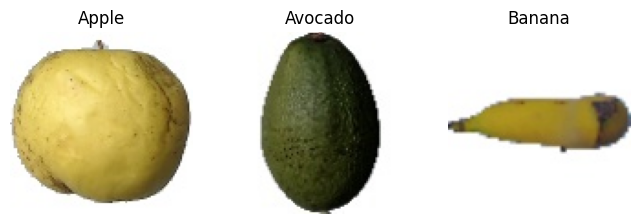

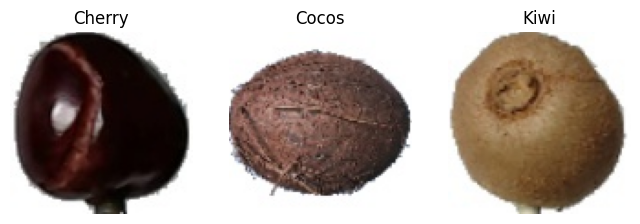

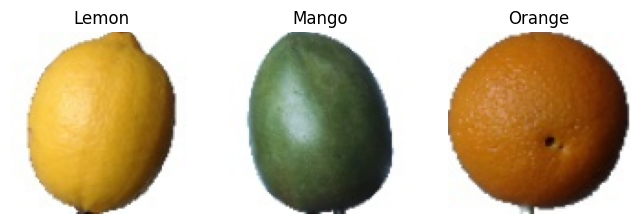

In [32]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

In [33]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying


In [34]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


In [35]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [36]:
Y_train.shape

(4306, 9)

In [37]:
X_train.shape

(4306, 100, 100, 3)

In [38]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [39]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=18

In [40]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0.5,
                           zoom_range=0.5,
                           width_shift_range=0.5,
                           height_shift_range=0.5,
                           horizontal_flip=False,
                           vertical_flip=False,
                           )
datagen.fit(x_train)

history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )


<ipython-input-40-bf730e3e37d6>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,


Epoch 1/10
191/191 [==============================] - 13s 60ms/step - loss: 1.7736 - accuracy: 0.2983 - val_loss: 1.1074 - val_accuracy: 0.4490
Epoch 2/10
191/191 [==============================] - 9s 47ms/step - loss: 0.6728 - accuracy: 0.7534 - val_loss: 0.2168 - val_accuracy: 0.9733
Epoch 3/10
191/191 [==============================] - 10s 53ms/step - loss: 0.2873 - accuracy: 0.9016 - val_loss: 0.3896 - val_accuracy: 0.8086
Epoch 4/10
191/191 [==============================] - 10s 53ms/step - loss: 0.2314 - accuracy: 0.9229 - val_loss: 0.2501 - val_accuracy: 0.9211
Epoch 5/10
191/191 [==============================] - 11s 56ms/step - loss: 0.1695 - accuracy: 0.9405 - val_loss: 0.1488 - val_accuracy: 0.9455
Epoch 6/10
191/191 [==============================] - 10s 54ms/step - loss: 0.1918 - accuracy: 0.9440 - val_loss: 0.1126 - val_accuracy: 0.9640
Epoch 7/10
191/191 [==============================] - 9s 48ms/step - loss: 0.0887 - accuracy: 0.9717 - val_loss: 0.1152 - val_accuracy: 0

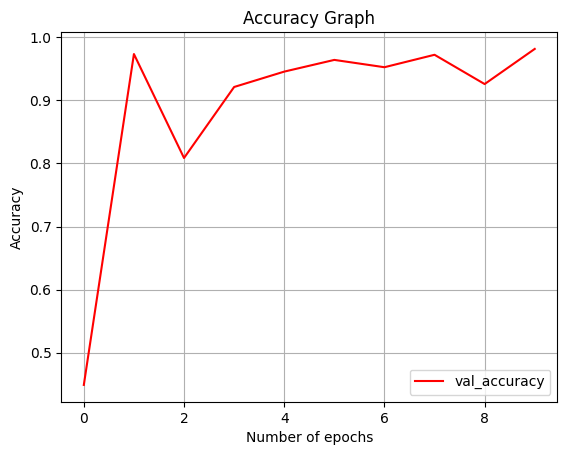

In [42]:
plt.plot(history.history["val_accuracy"], color="r", label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

27/27 [==============================] - 0s 10ms/step


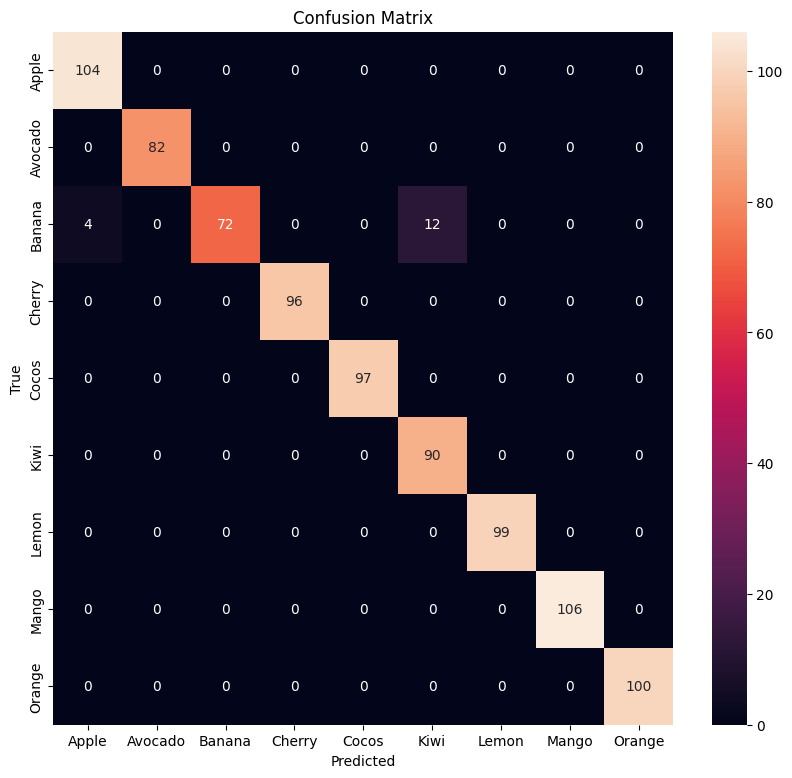

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)
fruit_names = ["Apple", "Avocado", "Banana", "Cherry", "Cocos", "Kiwi", "Lemon", "Mango", "Orange"]
plt.figure(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f', xticklabels=fruit_names, yticklabels=fruit_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


46/46 [==============================] - 0s 8ms/step


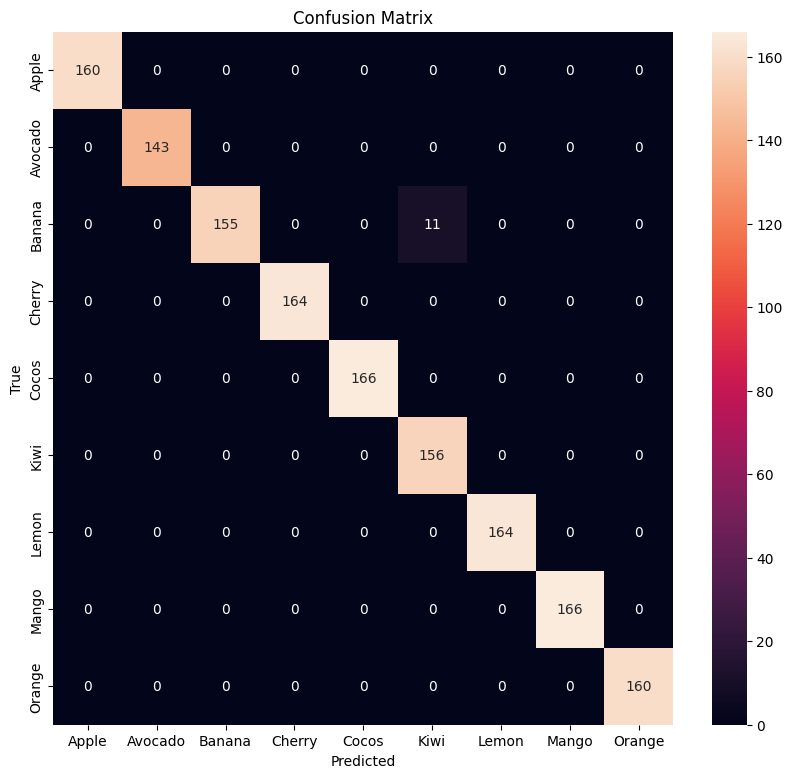

In [45]:
y_pred2 = model.predict(X_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(Y_test, axis=1)
conf_mat2 = confusion_matrix(y_true2, y_pred_classes2)
fruit_names = ["Apple", "Avocado", "Banana", "Cherry", "Cocos", "Kiwi", "Lemon", "Mango", "Orange"]
plt.figure(figsize=(10, 9))
sns.heatmap(conf_mat2, annot=True, fmt=".0f", xticklabels=fruit_names, yticklabels=fruit_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
